**Import dependancies**

In [1]:
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, metrics
import matplotlib.pyplot as plt
import numpy

**Import the dataset**

In [2]:
dataSet = pandas.read_csv("z-AssignmentTrainingData100.csv")
#print(dataSet)

**Convert non-numerical fields to numerical values**

In [3]:
convert = {True: 1, False: 0}
dataSet['SuccessTF'] = dataSet['SuccessTF'].map(convert)
#print(dataSet)

**Divide the data into features (Attributes), and output (labels)**

In [4]:
features = ['OvertakingSpeedMPS', 'OncomingSpeedMPS', 'InitialSeparationM']
input = dataSet[features]
output = dataSet['SuccessTF']
#print(input)
#print(output)

**SKLEARN has the ability to automtically split dataset into training and testing data**

In [5]:
from sklearn.model_selection import train_test_split
input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.2, random_state=0)

**Now create the tree and train the model**

In [6]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(input, output)

**Now plot the tree into readable form.**
    <br> > The top label shows what feature it is splitting on, and the value it is splitting at
    <br> > The second label is the entropy value, 0.0 = all items got the same result, 0.5 = items were split 50/50
    <br> > The third label is the total number of items being looked at
    <br> > The bottom label is the result of the split, number of items that went each side

[Text(0.4583333333333333, 0.9, 'InitialSeparationM <= 212.75\ngini = 0.493\nsamples = 100\nvalue = [56, 44]'),
 Text(0.25, 0.7, 'OvertakingSpeedMPS <= 20.8\ngini = 0.156\nsamples = 47\nvalue = [43, 4]'),
 Text(0.16666666666666666, 0.5, 'InitialSeparationM <= 155.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 42\nvalue = [42, 0]'),
 Text(0.6666666666666666, 0.7, 'OvertakingSpeedMPS <= 27.7\ngini = 0.37\nsamples = 53\nvalue = [13, 40]'),
 Text(0.5, 0.5, 'OncomingSpeedMPS <= 31.75\ngini = 0.1\nsamples = 38\nvalue = [2, 36]'),
 Text(0.4166666666666667, 0.3, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]'),
 Text(0.5833333333333334, 0.3, 'OvertakingSpeedMPS <= 24.8\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.1, 'gini = 0

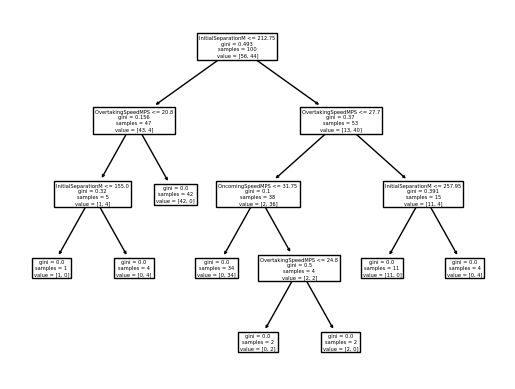

In [7]:
tree.plot_tree(dtree, feature_names=features)

**Use the model to test predict new things**

In [8]:
outcome = dtree.predict(input_test)

**Evaluate how good the algorithm is:**
<br>For regression problems you can use metrics to evaluate an algorithm:
- mean absolute error (expect to be within 10% of range of values)
- root mean squared error (expect to be within 10% of average)

In [9]:
mae = metrics.mean_absolute_error(output_test, outcome)
print('Mean Absolute Error:', mae)
maeCheck = (max(output_test)-min(output_test))*0.1
if mae > maeCheck:
    print('\033[91m'+'MAE indicates your algorithm needs improving'+'\033[0m')


evalValue = numpy.sqrt(metrics.mean_squared_error(output_test, outcome))
print('Root Mean Squared Error:', evalValue)
avgOutput = numpy.average(output)
if evalValue > avgOutput*0.1:
    print('\033[91m'+'RSME indicates your algorithm needs improving'+'\033[0m')

Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0


**Now finally use the model to predict an actual result**
<br>Set your prediction data, you can do it manually or use a dataframe to avoid user warnings

In [14]:
predictData = pandas.DataFrame(columns=features, index=[0])
predictData.loc[0] = pandas.Series({'OvertakingSpeedMPS': 21.1, 'OncomingSpeedMPS': 26.4, 'InitialSeparationM': 218.1})
#expect false

outcome = dtree.predict(predictData)
print(outcome)

[1]


**Round the result in case its not a whole number before convert to normal text**
<br>`def` is short for definition - it is the python way of defining a method/function

In [11]:
def round_half_up(n, decimals=0):
    multiplier = 10 ** decimals
    return numpy.floor(n*multiplier + 0.5) / multiplier

outcome = round_half_up(outcome, decimals=0)
print(outcome)

[0.]


**Now convert to text and give an output**

In [12]:
if outcome == 0:
    print('\033[91m'+'\033[1m'+'I recommend you DO NOT overtake.'+'\033[0m')
elif outcome == 1:
    print('\033[92m'+'\033[1m'+'You can safely overtake.'+'\033[0m')
else:
    print('\033[96m'+'\033[1m'+'The outcome is unknown. Proceed at your own risk.'+'\033[0m')

I recommend you DO NOT overtake.
